## Campos involucrados

- titulo
- descripcion

## Ideas

- wordcloud
- normalizacion
- stemming
- palabras positivas (respecto al precio)
- palabras negativas (respecto al precio)

## Hipótesis

- ciertas palabras indican mayor precio (luminoso, jardín, hermoso, vista...)
- a más palabras, mayor precio

## Resultados
- la correlacion entre longitud de descripcion y precio es bastante baja (0.1)
- la correlacion entre la cantidad de palabras positivas en la descripcion y el precio es bastante alta (0.3) [tener en cuenta que metrostotales tiene correlacion 0.5]

In [1]:
#importo las funciones para levantar los dataframes
%run "../../utils/dataset_parsing.ipynb"
#importo las funciones para graficar
%run "../../utils/graphs.ipynb"

In [2]:
df = levantar_datos("../../"+DATASET_RELATIVE_PATH)
df.columns
pd.set_option("display.max_colwidth", -1)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
import nltk  
from nltk.corpus import stopwords  
from string import punctuation  

In [4]:
spanish_stopwords = set(stopwords.words('spanish'))
non_words = set(punctuation)
non_words.update({'¿', '¡'})
non_words.update(map(str,range(10)))

In [5]:
# agrego palabras comunes que detecte y no son relevantes
stopwords_extra = {"fracc", "cada", "mas", "ntilde", "consta", "tres", "dos", "solo", "cuenta", "areas", "tipo", "nbsp", "oacute", "hrs", "aacute", "palapa", "easybroker", "tarja", "cuatro", "uacute", "cancel", "asi", "hace", "tan", "dia", "ningun" }

In [6]:
import re
from unidecode import unidecode

def is_meaningful(word: str) -> bool:
    """
        Recibe una palabra, remueve puntuaciones y verifica que lo que queda no esté en el set de stopwords
    """
    return len(word) > 2 and not word in spanish_stopwords

def remove_html(field: str) -> str:
    """
        Recibe un texto y devuelve una copia sin los tags html
    """
    return re.compile(r'<[^>]+>').sub('', field) if field else field

def normalize(field: str) -> str:
    """
        Recibe un texto y devuelve una copia sin acentos, ñ ni puntuaciones.
    """
    return ''.join([" " if c in non_words else unidecode(c) for c in field]).strip() if field else ""

def limpiar_campo(field: str) -> str:
    """
        Recibe un campo string que podría tener muchas palabras.
        Devuelve un string que contiene sólo las palabras significativas.
    """
    if not isinstance(field,str): return ""
    without_html = remove_html(field)
    normalized = normalize(without_html)
    meaningful = " ".join(set(filter(is_meaningful, normalized.split())))
    return meaningful

In [7]:
df["descripcion_limpia"] = df["descripcion"].map(limpiar_campo)
df["len_descripcion"] = df["descripcion_limpia"].map(lambda x: len(x.split()))

In [8]:
df["titulo_limpio"] = df["titulo"].map(limpiar_campo)
df["len_titulo"] = df["titulo_limpio"].map(lambda x: len(x.split()))

In [9]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad', 'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'precio', 'mes', 'ano', 'dia', 'precio_metro_cubierto', 'precio_metro_total', 'gps', 'descripcion_limpia', 'len_descripcion', 'titulo_limpio', 'len_titulo'], dtype='object')

In [10]:
# Busco la correlacion entre longitud de descripción y precio
df[["len_descripcion","precio_metro_cubierto"]].corr()

,len_descripcion,precio_metro_cubierto
len_descripcion,1.00000,0.02707
precio_metro_cubierto,0.02707,1.00000


In [11]:
# Para comparar, busco la correlación entre metrostotales y precio
df[["metrostotales","precio"]].corr()

,metrostotales,precio
metrostotales,1.000000,0.514411
precio,0.514411,1.000000


In [12]:
df.corr()["precio_metro_total"]

id                            0.000639
antiguedad                    0.063291
habitaciones                  0.017543
garages                       0.141638
banos                         0.209601
metroscubiertos               0.152475
metrostotales                -0.102358
idzona                        0.152093
lat                          -0.207195
lng                           0.051874
gimnasio                      0.137666
usosmultiples                 0.135319
piscina                       0.070761
escuelascercanas              0.032006
centroscomercialescercanos    0.075346
precio                        0.611621
mes                           0.045121
ano                           0.136128
dia                           0.003091
precio_metro_cubierto         0.755098
precio_metro_total            1.000000
len_descripcion               0.069088
len_titulo                   -0.002913
Name: precio_metro_total, dtype: float64

In [13]:
df.corr()["precio_metro_cubierto"]

id                            0.001112
antiguedad                   -0.007179
habitaciones                 -0.154787
garages                       0.065837
banos                         0.092688
metroscubiertos              -0.065978
metrostotales                 0.030943
idzona                        0.158379
lat                          -0.190822
lng                           0.046633
gimnasio                      0.168510
usosmultiples                 0.136951
piscina                       0.095843
escuelascercanas              0.007984
centroscomercialescercanos    0.055803
precio                        0.577108
mes                           0.046642
ano                           0.153618
dia                           0.004032
precio_metro_cubierto         1.000000
precio_metro_total            0.755098
len_descripcion               0.027070
len_titulo                   -0.022519
Name: precio_metro_cubierto, dtype: float64

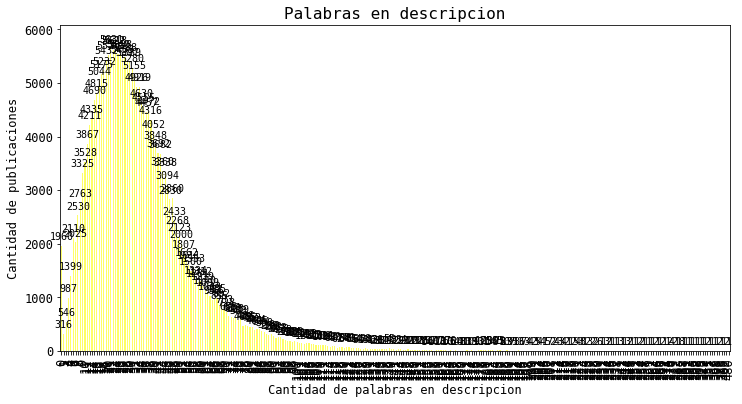

In [14]:
plot = get_barplot(df["len_descripcion"].value_counts().sort_index(), title="Palabras en descripcion", x_label="Cantidad de palabras en descripcion", y_label="Cantidad de publicaciones")
plot.figure.savefig("../graficos/barplot_palabras_descripcion.png")

In [15]:
serie = df["len_descripcion"]

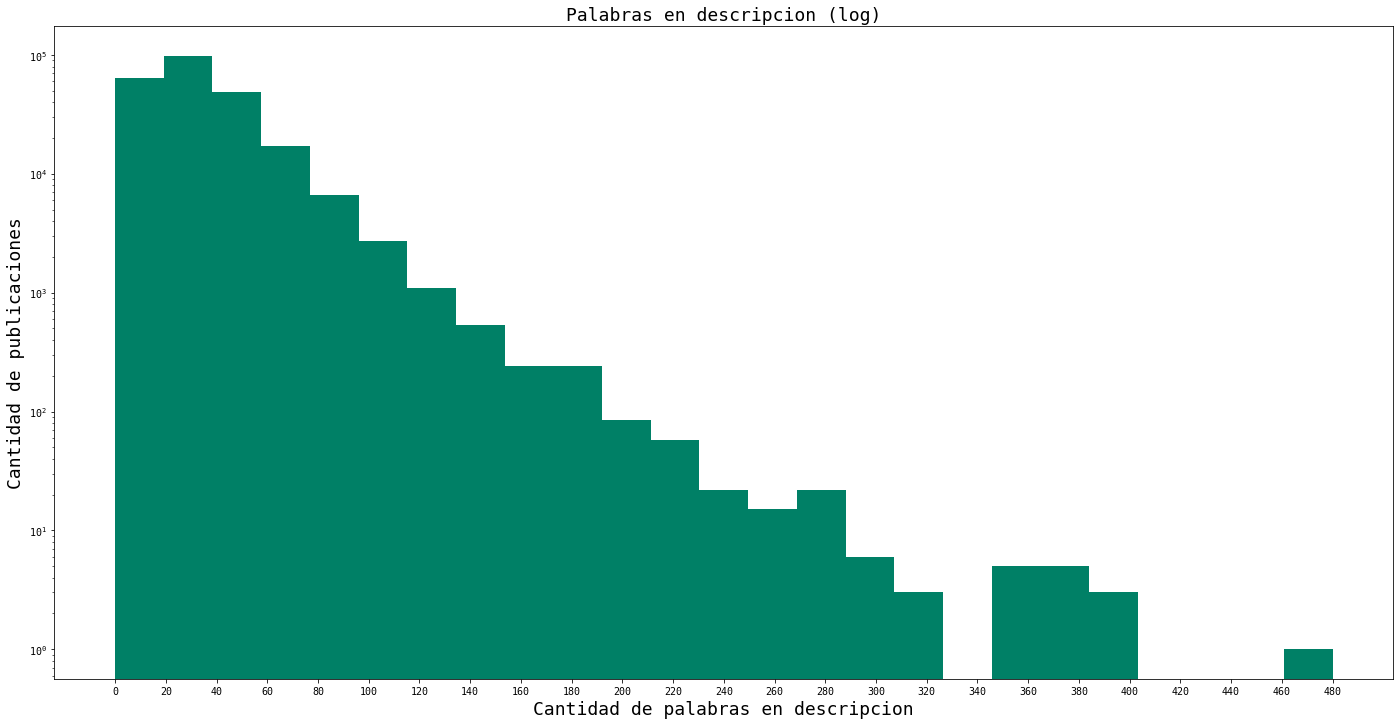

In [16]:
plot = serie.plot(kind="hist",figsize=(24,12),xticks=range(0,500,20), bins=25, logy=True, cmap="summer")
fontdict={"fontsize":18}
plot.set_title("Palabras en descripcion (log)", fontdict=fontdict)
plot.set_xlabel("Cantidad de palabras en descripcion", fontdict=fontdict)
plot.set_ylabel("Cantidad de publicaciones", fontdict=fontdict)
plot.figure.savefig("../graficos/hist_palabras_descripcion")

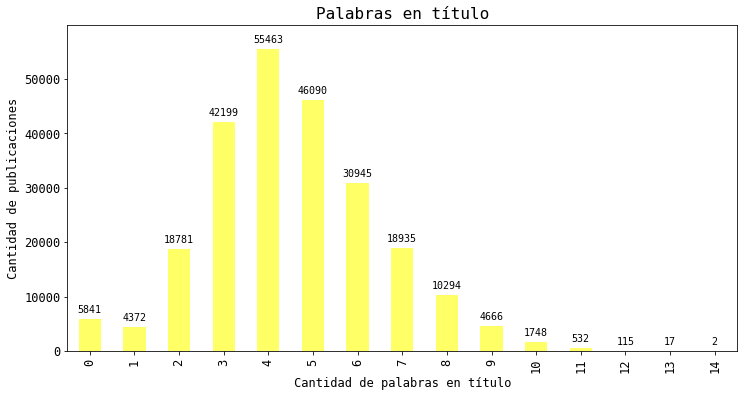

In [17]:
plot = get_barplot(df["len_titulo"].value_counts().sort_index(), title="Palabras en título", x_label="Cantidad de palabras en título", y_label="Cantidad de publicaciones")
plot.figure.savefig("../graficos/barplot_palabras_titulo.png")

In [18]:
from collections import Counter

def get_word_counter(series):
    """
        Faltaría analizar stemming
    """
    counter = Counter()
    for title in series.values:
        counter.update(set(title.split()))
    return counter

In [19]:
titulo_palabras = get_word_counter(df["titulo_limpio"])
descripcion_palabras = get_word_counter(df["descripcion_limpia"])

In [20]:
print(len(titulo_palabras),len(descripcion_palabras))

18578 72121


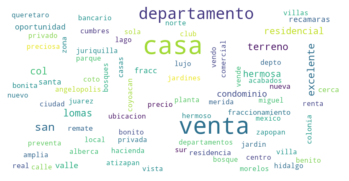

In [21]:
wc = get_wordcloud(titulo_palabras)
wc.to_file("../graficos/wordcloud_titulo.png")

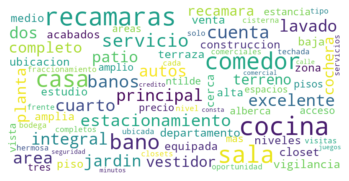

In [22]:
wc = get_wordcloud(descripcion_palabras)
wc.to_file("../graficos/wordcloud_descripcion.png")

In [23]:
# titulo_palabras.most_common(10)

In [24]:
# descripcion_palabras.most_common(10)

In [25]:
palabras_positivas = {"vigilancia","hermosa","diseño","vistas","playa","conservacion","tenis","balcon","panoramica","exclusivos","golf","canchas","remodelada","acondicionado","lujo","jacuzzi","diseno","exclusiva","magnifica","exclusivo","country","precioso","estilo","seguridad","verdes","juegos","servicio","excelente","terraza","jardin","hermosa","vista","bonita","renta", "granito","porcelanato","mejores"}
palabras_negativas = {"oportunidad","remato","oferta","remodelar", "inversion"}

In [45]:
df["palabras_positivas_descripcion"] = df["descripcion_limpia"].map(lambda x: " ".join([y for y in x.split() if y in palabras_positivas]))
df["cantidad_palabras_positivas_descripcion"] = df["palabras_positivas_descripcion"].map(lambda x: len(x.split()))
df[["cantidad_palabras_positivas_descripcion","precio_metro_total"]].corr()

,cantidad_palabras_positivas_descripcion,precio_metro_total
cantidad_palabras_positivas_descripcion,1.00000,0.18112
precio_metro_total,0.18112,1.00000


In [46]:
df["palabras_negativas_descripcion"] = df["descripcion_limpia"].map(lambda x: " ".join([y for y in x.split() if y in palabras_negativas]))
df["cantidad_palabras_negativas_descripcion"] = df["palabras_negativas_descripcion"].map(lambda x: len(x.split()))
df[["cantidad_palabras_negativas_descripcion","precio_metro_total"]].corr()

,cantidad_palabras_negativas_descripcion,precio_metro_total
cantidad_palabras_negativas_descripcion,1.000000,-0.014546
precio_metro_total,-0.014546,1.000000


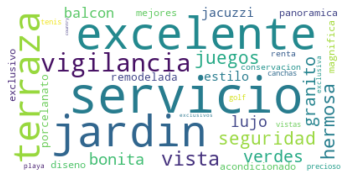

In [28]:
counter_positivas = get_word_counter(df["palabras_positivas_descripcion"])
wc_positivas = get_wordcloud(counter_positivas)
wc_positivas.to_file("../graficos/wordcloud_positivas.png")

In [44]:
counter_positivas.most_common(10)

[('servicio', 73581),
 ('excelente', 58706),
 ('jardin', 54490),
 ('terraza', 40012),
 ('vigilancia', 37640),
 ('vista', 22967),
 ('hermosa', 19250),
 ('seguridad', 17373),
 ('juegos', 17177),
 ('verdes', 15035)]

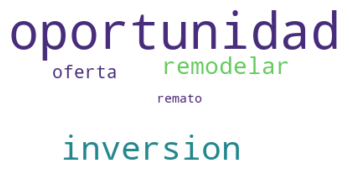

In [29]:
counter_negativas = get_word_counter(df["palabras_negativas_descripcion"])
wc_negativas = get_wordcloud(counter_negativas)
wc_negativas.to_file("../graficos/wordcloud_negativas.png")

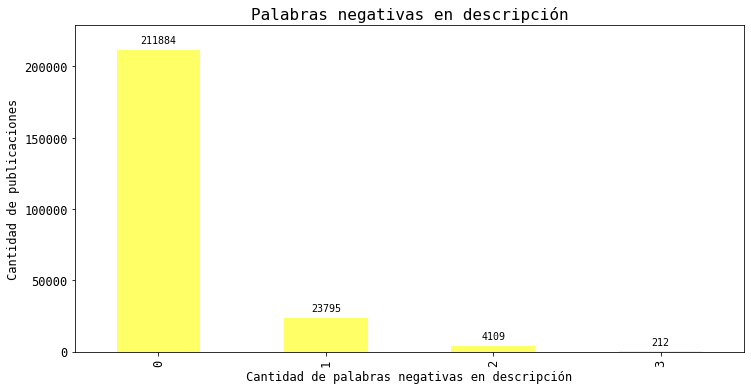

In [36]:
plot = get_barplot(df.cantidad_palabras_negativas_descripcion.value_counts(), title="Palabras negativas en descripción", x_label="Cantidad de palabras negativas en descripción", y_label="Cantidad de publicaciones")
plot.figure.savefig("../graficos/barplot_palabras_negativas_descripcion.png")

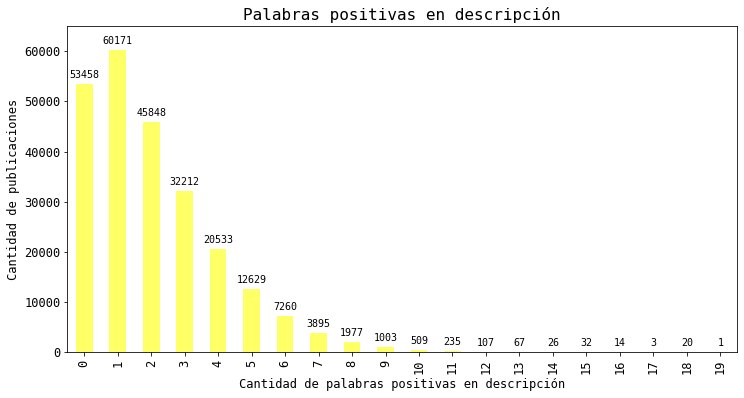

In [37]:
plot = get_barplot(df.cantidad_palabras_positivas_descripcion.value_counts().sort_index(), title="Palabras positivas en descripción", x_label="Cantidad de palabras positivas en descripción", y_label="Cantidad de publicaciones")
plot.figure.savefig("../graficos/barplot_palabras_positivas_descripcion.png")

In [38]:
df_corr_positivas = df[["descripcion_limpia","precio"]]
for palabra in palabras_positivas:
    df_corr_positivas[palabra] = df_corr_positivas["descripcion_limpia"].map(lambda x: int(palabra in x))
df_corr_positivas.corr()["precio"].sort_values(ascending=False)

c:\users\dev\repos\fiuba\75-06\2019-2\tp\.venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


precio           1.000000
terraza          0.223338
jardin           0.208592
vista            0.194534
jacuzzi          0.157660
lujo             0.155200
juegos           0.144366
servicio         0.132612
vigilancia       0.107438
granito          0.102580
estilo           0.099340
hermosa          0.097818
vistas           0.091635
exclusivo        0.091339
panoramica       0.087759
precioso         0.086908
balcon           0.081591
tenis            0.073820
excelente        0.065813
golf             0.064149
seguridad        0.060509
exclusiva        0.055698
diseno           0.052607
country          0.051681
remodelada       0.051611
porcelanato      0.048484
mejores          0.044742
exclusivos       0.040721
magnifica        0.039993
conservacion     0.028719
renta            0.026840
acondicionado    0.022942
canchas          0.021226
playa           -0.002151
verdes          -0.022241
bonita          -0.040270
diseño          NaN      
Name: precio, dtype: float64

In [39]:
df_corr_negativas = df[["descripcion_limpia","precio"]]
for palabra in palabras_negativas:
    df_corr_negativas[palabra] = df_corr_negativas["descripcion_limpia"].map(lambda x: int(palabra in x))
df_corr_negativas.corr()["precio"].sort_values(ascending=True)

c:\users\dev\repos\fiuba\75-06\2019-2\tp\.venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


oportunidad   -0.042807
oferta        -0.031834
remato        -0.017778
inversion     -0.012579
remodelar      0.049695
precio         1.000000
Name: precio, dtype: float64

In [40]:
test = df[["descripcion_limpia","precio","metrostotales"]]
for palabra in palabras_positivas:
    test[palabra] = test["descripcion_limpia"].map(lambda x: int(palabra in x))

c:\users\dev\repos\fiuba\75-06\2019-2\tp\.venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
top = list(set(test.corr()["metrostotales"].sort_values(ascending=False).head(8).index).union(set(test.corr()["precio"].sort_values(ascending=False).head(8).index)))

In [42]:
test_corr = test[top].corr()
test_corr["dif"] = test_corr["precio"] - test_corr["metrostotales"]
test_corr["dif"] = abs(test_corr["dif"])

In [43]:
test_corr["dif"].sort_values(ascending=False)
#estas se me ocurre que serian las palabras que mayor diferencia podrian hacer

metrostotales    0.485589
precio           0.485589
juegos           0.078725
lujo             0.077370
vista            0.070146
jacuzzi          0.052263
terraza          0.038639
jardin           0.025931
granito          0.006427
hermosa          0.004686
Name: dif, dtype: float64